# Facebook Post Prediction

By: Sara Jafroudi, Enoch Cheung, Jason Ngo, Bruno Gagnon

https://github.com/calamari99/Facebook-Post-Predictor.git

---------------------------------------------------------------------------------------------------------

## Table of Contents:

1. Introduction
    
    a) Research Question
    
    b) Overview
    
2. Methods & Results
    
    a) Selection of Data
    
             i) Tidying Data


    b) Training, Validation, and Testing Sets
    
          i) Compartmentalization
         ii) Training Data Summaries


    c) Preprocessing
    
          i) Preliminary Data Analysis
         ii) Identification of Class Imbalances
        iii) Balancing Decision


    d) Building our Model
    
          i) Overview
         ii) Tuning
        iii) Accuracy Comparison


    e) Analysis
    
          i) Classifying a New Observation


    f) Results
    
3. Discussion
    
4. References

---

## 1. Introduction

### a) Research Question:
How can an author increase engagement from users on Facebook and can we predict the success of a post using insights from an author's page?


### b) Overview:
The market utility of social media platforms such as Facebook, which are able to generate mass revenues for cosmetic brands, has been an established and exploited advertising strategy in the digital age (Moro et. al, 2016).
The goal of this project is to take a predictive analytical approach to determine which type of Facebook post (i.e., photo, video, status, or link) will engage the most internet-user engagement, determined through variables such as likes, post consumptions, and post total reach.
The dataset which will be used for this analysis was acquired through an experimental data mining technique which included scraping data from the Facebook page of an internationally renowned cosmetics company on posts made between January 1st and December 31st (Moro et. al., 2016).

We will use the variables of the continuous numerical variables of total reaches (Lifetime_Post_Total_Reach) and the number of total interactions (Total_Interactions), and the categorical variable of Facebook post (Type).
We chose the two continuous numerical variables of total reach and total interactions as predictors because they are key indicators of success that are interrelated.
Although we do not consider factors such as the type of users (influencers, company profiles, regular users, etc.), the variable of total reach must be put in relations with total interactions to offer a valuable insight.
That is because total interactions influence Facebook's algorithm that may result in a viral post and thus increase the total reach regardless of the extent of the user's total network (e.g. number of friends and affiliated groups) (Quesenberry & Coolsen, 2019).
Therefore, the variables of total reach and total interactions must be paired to fully grasp the success of a post as both can create a positive feedback loop. 

For the methodology, we will look at the relationship between these variables in a scatter plot graph that will help us to formulate our hypothesis.
Then, as we are trying to predict the type of post that will be the most successful, we will use a K-nearest neighbour classification analysis.
To do so, we must determine the K value using cross-validation of the training data.
Then, we will need to test the accuracy of the classifier with the testing data.

We expect to find that posts which include media, such as photos and videos, are more likely to engage users than other posts, such as statuses and links.
This is based on the assumption that the former types of posts might be more likely to be shared and thus will have more exposure.
It is beneficial for social media platforms to increase user engagement, as this is likely to increase revenue through advertising.
Therefore, these findings may be used to choose what type of posts are prioritized to maximize user engagement.

These findings may lead to further exploration of how the contents of these posts impact user engagement.
This may include the duration of a video, content of an image, length of a status, or details about the contents of a link. 

---

## 2. Methods & Results

#### Global options

Here, we set some global parameters in order to reduce cluttering of output information as well as the visibility of warning messages. The latter is enforced later in the code with suppressMessages().

In [1]:
options(repr.matrix.max.rows = 8)
options(warn = -1)

#### List of Packages Used

In [3]:
library(caTools)
library(dplyr)
library(readr)
library(ggplot2)
library(tidyr)
library(grid)
library(gridExtra)
library(kknn)
library(repr)
library(cowplot)
library(tidyverse)
library(tidymodels)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
✖ lubridate::stamp()   masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.1.0   

### a) Selection of Data

First, we read in our data from a remote GitHub repository.
We ensured that all variables were converted to factors (i.e., categorical variables) since this data type agrees well with KNN classification algorithms.
Further, since certain functions do not permit manipuation of columns which have a space in their name, we removed all spaces from column names.

In [57]:
source("../R/select_data_from_URL.R")
read_data_from_url("https://raw.githubusercontent.com/calamari99/Facebook-Post-Predictor/main/data/dataset_Facebook.csv", facebook)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 500 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): Type
dbl (18): Page total likes, Category, Post Month, Post Weekday, Post Hour, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Page_total_likes Type   Category Post_Month Post_Weekday Post_Hour Paid
1   139441           Photo  2        12         4            3         0   
2   139441           Status 2        12         3            10        0   
3   139441           Photo  3        12         3            3         0   
4   139441           Photo  2        12         2            10        1   
⋮   ⋮                ⋮      ⋮        ⋮          ⋮            ⋮         ⋮   
497 81370            Photo  2        1          5            8         0   
498 81370            Photo  1        1          5            2         0   
499 81370            Photo  3        1          4            11        0   
500 81370            Photo  2        1          4            4         NA  
    Lifetime_Post_Total_Reach Lifetime_Post_Total_Impressions
1    2752                      5091                          
2   10460                     19057                          
3    2413                      4373                          
4   50128                     87991                          
⋮   ⋮                         ⋮                              
497 3480                      6229                           
498 3778                      7216                           
499 4156                      7564                           
500 4188                      7292                           
    Lifetime_Engaged_Users Lifetime_Post_Consumers Lifetime_Post_Consumptions
1    178                    109                     159                      
2   1457                   1361                    1674                      
3    177                    113                     154                      
4   2211                    790                    1119                      
⋮   ⋮                      ⋮                       ⋮                         
497 537                    508                     687                       
498 625                    572                     795                       
499 626                    574                     832                       
500 564                    524                     743                       
    Lifetime_Post_Impressions_by_people_who_have_liked_your_Page
1    3078                                                       
2   11710                                                       
3    2812                                                       
4   61027                                                       
⋮   ⋮                                                           
497 3961                                                        
498 4742                                                        
499 4534                                                        
500 3861                                                        
    Lifetime_Post_reach_by_people_who_like_your_Page
1    1640                                           
2    6112                                           
3    1503                                           
4   32048                                           
⋮   ⋮                                               
497 2104                                            
498 2388                                            
499 2452                                            
500 2200                                            
    Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post comment
1    119                                                                 4     
2   1108                                                                 5     
3    132                                                                 0     
4   1386                                                                58     
⋮   ⋮                                                                   ⋮      
497 301                                                                 0      
498 363                                                                 4      
499 370                 

In [47]:
facebook_url <-
    "https://raw.githubusercontent.com/calamari99/Facebook-Post-Predictor/main/data/dataset_Facebook.csv"

facebook <- read_csv2(facebook_url) %>%
    suppressMessages()

# Replacing specified columns to categorical factors
cols <- c("Type", "Category", "Post Month", "Paid", "Post Weekday", "Post Hour")
facebook[cols] <- lapply(facebook[cols], as.factor)

# # Renaming column headers in order to remove spaces
facebook_colname_fix <- facebook
facebook_col_name_vec <- gsub(" ", "_", colnames(facebook))
colnames(facebook) <- facebook_col_name_vec

#### i) Tidying Data

Let us select only the variables relevant to our analysis.

To specify the best type of post possible and to explore the relationship between the metrics produced by a post and the post type.
We determined that the following key performance indicators best describe a post's success:
- comments
- likes
- shares
- total interactions (summation of the 3 observations above) 

In [54]:
#call function from R script
source("../R/clean_data.R")
clean_data(facebook)

[1] "Table 1. Facebook data summary"


Type   unpaid paid
1 Link    16      6 
2 Photo  302    119 
3 Status  35     10 
4 Video    3      4

In [55]:
# Select variables relevant to our analysis
facebook_clean <- dplyr::select(facebook, Type, comment,
                                like, share, Total_Interactions,
                                Paid, Lifetime_Post_Total_Impressions,
                                Lifetime_Post_Total_Reach) %>%
                            na.omit(df)

# Separate paid and unpaid posts
facebook_clean_unpaid <- facebook_clean %>% filter(Paid == 0)
facebook_clean_paid <- facebook_clean %>% filter(Paid == 1)

# Summary of unpaid posts by type
unpaid_summary <- facebook_clean_unpaid %>% group_by(Type) %>% 
    summarise(unpaid = n()) 

# Summary of paid posts by type
paid_summary <- facebook_clean_paid %>% group_by(Type) %>% 
    summarise(paid = n())

print("Table 1. Facebook data summary")
Reduce(dplyr::full_join, list(unpaid_summary, paid_summary)) %>%
    suppressMessages()

[1] "Table 1. Facebook data summary"


Type   unpaid paid
1 Link    16      6 
2 Photo  302    119 
3 Status  35     10 
4 Video    3      4

Within our 500 data points collected, we have filtered out all observations with NA values and separated our data into paid and unpaid categories due to additive relationships.
This allows us to explore the relationship between post type and our defined success metric.
Moving forward, this study will only evaluate on media postings without paid advertising.

> Note:
Social media algorithms that adjust prioritizations between paid and non-paid posts can heavily factor into our metrics received and should be considered in this analysis.
To control for this potential source of uncertainty, we have isolated our data into paid and unpaid categories. 

---

### b) Training, Validation, and Testing Sets 



#### i) Compartmentalization
We have split our data into training and testing sets in order to reduce bias within our model data and testing data. 

*Distribution of Training and Testing set*
<br>
- Testing set will be 20% of data collected
<br>
- Validation set will be 10% of data collected
<br>
- Training data set be 70% of data collected

*Cross-validation technique*
<br>
let us split our data into 10 total groups.
<br>
(~25 points tested, 100 points for training)

We chose to approach our training data by creating a 80:20 ratio between testing and training data where the  training set is composed of both the “validation” and “training” set.
We have also chosen a 10-fold cross-validation procedure to establish unbiased estimators.

#### Defining variables:

In [6]:
set.seed(99)
partitionTrain = 0.8
ratioTrainValidation = 7/8

#### Total Posts:

In [7]:
# 80/20 ratio TrainingSet:TestingSet
split <- sample.split(facebook_clean$like, SplitRatio = partitionTrain)
train_val_data <- subset(facebook_clean, split == TRUE)
test_set <- subset(facebook_clean, split == FALSE)

split <- sample.split(train_val_data$like, SplitRatio = ratioTrainValidation)
train_set <- subset(train_val_data, split == TRUE)
val_set <- subset(train_val_data, split == FALSE)

print("Table 2. Total posts training data set")
train_set

[1] "Table 2. Total posts training data set"


Type  comment like share Total_Interactions Paid
1   Photo  4       79  17    100                0   
2   Photo 19      325  49    393                0   
3   Photo  3      249  27    279                1   
4   Photo  0      325  14    339                1   
⋮   ⋮     ⋮       ⋮    ⋮     ⋮                  ⋮   
343 Photo 10      125  41    176                0   
344 Photo  5       53  26     84                0   
345 Photo  0       53  22     75                0   
346 Photo  4       93  18    115                0   
    Lifetime_Post_Total_Impressions Lifetime_Post_Total_Reach
1    5091                            2752                    
2   13594                            7244                    
3   19479                           11692                    
4   24137                           13720                    
⋮   ⋮                               ⋮                        
343 9218                            5400                     
344 7536                            4684                     
345 6229                            3480                     
346 7216                            3778

#### Unpaid Posts:

In [8]:
split <- sample.split(facebook_clean_unpaid$like, SplitRatio = partitionTrain)
train_val_data_unpaid <- subset(facebook_clean_unpaid, split == TRUE)
test_set_unpaid <- subset(facebook_clean_unpaid, split == FALSE)

split <- sample.split(train_val_data_unpaid$like, SplitRatio = ratioTrainValidation)
train_set_unpaid <- subset(train_val_data_unpaid, split == TRUE)
val_set_unpaid <- subset(train_val_data_unpaid, split == FALSE)

print("Table 3. Unpaid posts training data set")
train_set_unpaid

[1] "Table 3. Unpaid posts training data set"


Type   comment like share Total_Interactions Paid
1   Status  5      130  29    164                0   
2   Photo  19      325  49    393                0   
3   Status  1      152  33    186                0   
4   Status  0      161  31    192                0   
⋮   ⋮      ⋮       ⋮    ⋮     ⋮                  ⋮   
245 Photo  17      185  55    257                0   
246 Photo  10      125  41    176                0   
247 Photo   5       53  26     84                0   
248 Photo   4       93  18    115                0   
    Lifetime_Post_Total_Impressions Lifetime_Post_Total_Reach
1   19057                           10460                    
2   13594                            7244                    
3   20849                           10472                    
4   22538                           11844                    
⋮   ⋮                               ⋮                        
245 13960                           8412                     
246  9218                           5400                     
247  7536                           4684                     
248  7216                           3778


#### ii) Training Data Summaries

- Number of observations of each type
- Mean and Median of key metrics in each post type


#### Summary of Unpaid Posts:

In [9]:
summ_train_unpaid <- train_set_unpaid %>%
    group_by(Type) %>%
    summarise(
        count = n(),
        mean_comment = mean(comment), 
        median_comment = median(comment), 
        mean_like = mean(like),
        median_like = median(like),
        mean_Total_Interactions = mean(Total_Interactions),
        median_Total_Interactions = median(Total_Interactions),
        mean_share = mean(share),
        median_share = median(share)) %>%
    suppressMessages()

print("Table 4. Summary of unpaid posts")
summ_train_unpaid

[1] "Table 4. Summary of unpaid posts"


Type   count mean_comment median_comment mean_like median_like
1 Link    10    3.100000    1              100.9000   73.5      
2 Photo  210    6.404762    2              155.9905   93.0      
3 Status  25    6.880000    3              145.8400  129.0      
4 Video    3   10.333333    6              216.0000  204.0      
  mean_Total_Interactions median_Total_Interactions mean_share median_share
1 119.8000                 85                       15.80000   11          
2 186.5476                115                       24.15238   18          
3 179.4800                164                       26.76000   27          
4 285.6667                271                       59.33333   44

---

### c) Preprocessing 

#### i) Preliminary Data Analysis

To inform our analysis later on, we first conducted a preliminary exploration of our dataset.

In order to gain more insight on the relationship between each type of post and the magnitude of its interactions, we started by taking the mean value of each interaction type with respect to each post type.

In [10]:
mean_comment <- summ_train_unpaid$mean_comment
mean_like <- summ_train_unpaid$mean_like
mean_Total_Interactions <- summ_train_unpaid$mean_Total_Interactions
mean_share <- summ_train_unpaid$mean_share
type <- summ_train_unpaid$Type

test_df <- data.frame(type,
                      mean_comment,
                      mean_like,
                      mean_share,
                      mean_Total_Interactions)

print("Table 5. Mean interactions for different types of posts")
test_df

fb_long <- test_df %>%
gather("Stat", "Value", -type)

print("Table 6. Mean interactions for different types of posts pivoted")
fb_long

[1] "Table 5. Mean interactions for different types of posts"


type   mean_comment mean_like mean_share mean_Total_Interactions
1 Link    3.100000    100.9000  15.80000   119.8000               
2 Photo   6.404762    155.9905  24.15238   186.5476               
3 Status  6.880000    145.8400  26.76000   179.4800               
4 Video  10.333333    216.0000  59.33333   285.6667

[1] "Table 6. Mean interactions for different types of posts pivoted"


type   Stat                    Value    
1  Link   mean_comment             3.100000
2  Photo  mean_comment             6.404762
3  Status mean_comment             6.880000
4  Video  mean_comment            10.333333
⋮  ⋮      ⋮                       ⋮        
13 Link   mean_Total_Interactions 119.8000 
14 Photo  mean_Total_Interactions 186.5476 
15 Status mean_Total_Interactions 179.4800 
16 Video  mean_Total_Interactions 285.6667

To compare how many likes, each post receives, we can filter the above table to only show likes.

In [11]:
filter_mean_like <- fb_long %>%
    filter(Stat == "mean_like") %>%
    arrange(desc(Value))

print("Table 7. Mean likes for different types of posts")
filter_mean_like

[1] "Table 7. Mean likes for different types of posts"


type   Stat      Value   
1 Video  mean_like 216.0000
2 Photo  mean_like 155.9905
3 Status mean_like 145.8400
4 Link   mean_like 100.9000

We can see from the above table that videos tend to receive the most likes on average, while links tend to receive the fewest.
We can compare these values by plotting them on a bar graph.

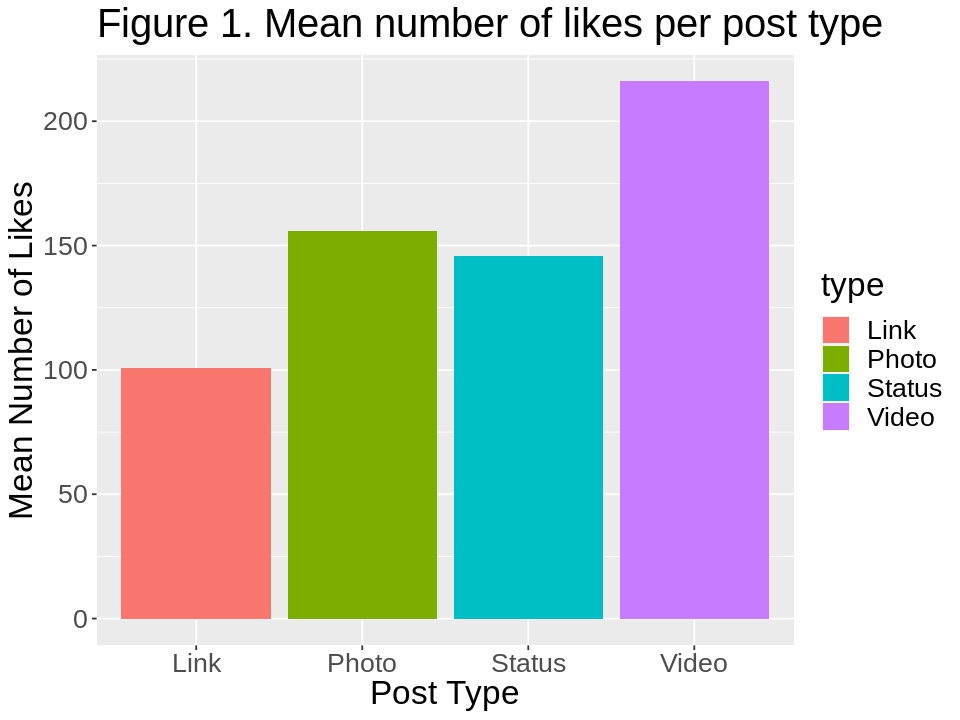

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6) 

mean_likes_bar <- ggplot(filter_mean_like, aes(x = type, y = Value, fill = type)) +
    geom_bar(stat = "identity") +
    labs(x = "Post Type", y = "Mean Number of Likes",
         title = "Figure 1. Mean number of likes per post type") +
    theme(text = element_text(size = 20)) 
mean_likes_bar

We can see from the graph above that videos tend to receive significantly more likes than other post types. Additionally, photos and status posts receive similar number of likes compared to each other. Links receive significantly fewer likes than all other types of posts.
<p>
If we repeat this process without filtering for likes, we can compare the engagement per post across all types of engagement.

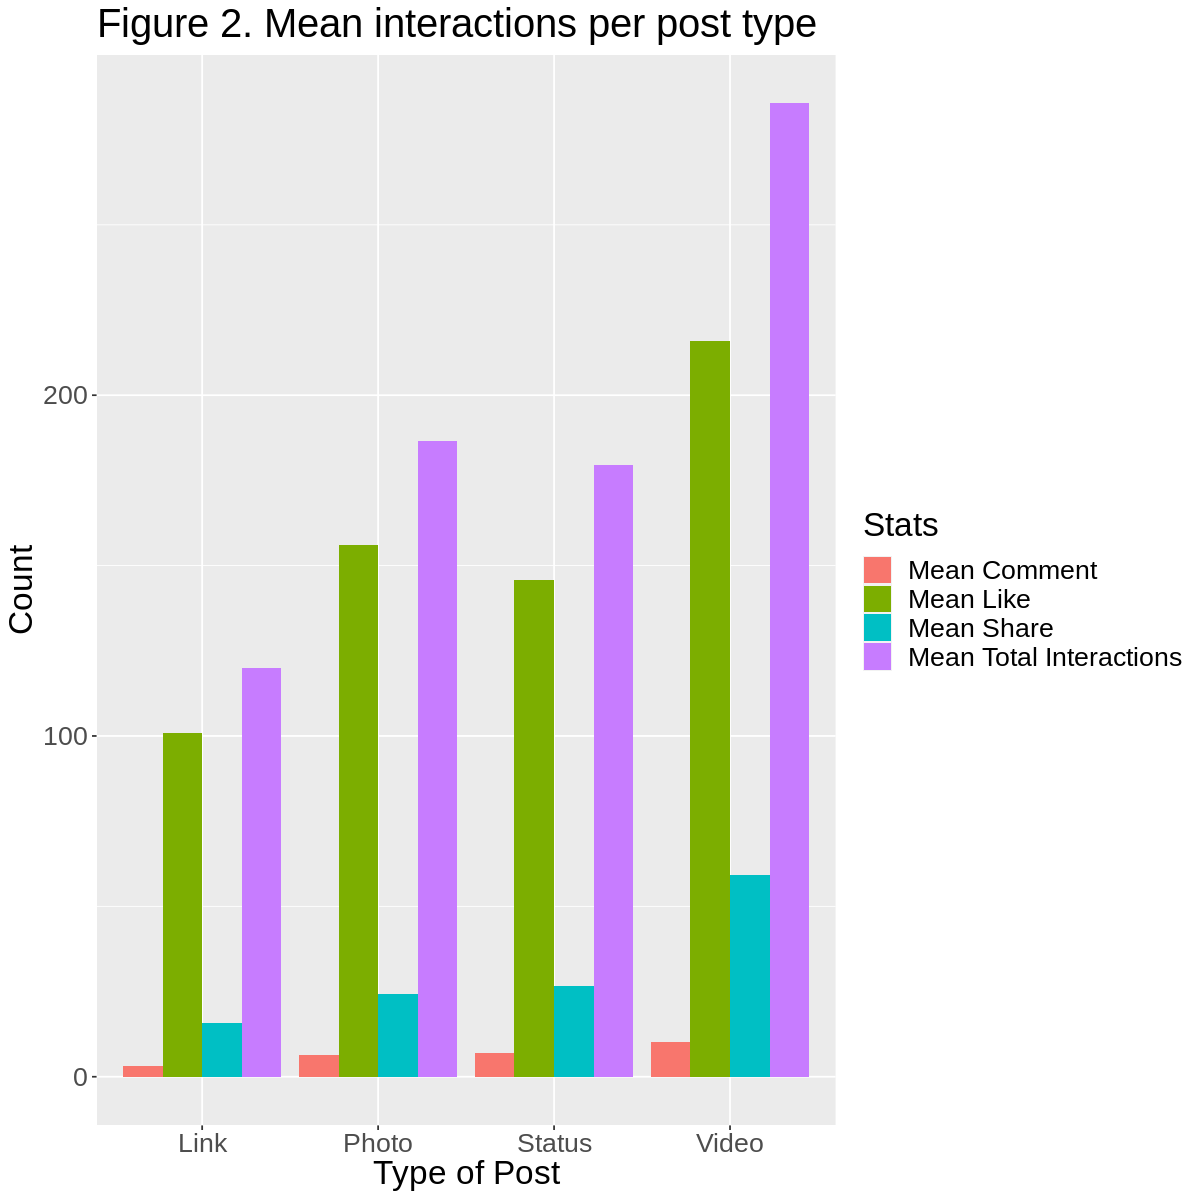

In [13]:
options(repr.plot.width=10, repr.plot.height=10)

mean_fb <- ggplot(fb_long, aes(x = type, y = Value, fill = Stat)) +
    geom_col(position = "dodge") +
    labs(x = "Type of Post", y = "Count", title="Figure 2. Mean interactions per post type") +
    scale_fill_discrete(name = "Stats",
                        labels = c("Mean Comment",
                                   "Mean Like",
                                   "Mean Share",
                                   "Mean Total Interactions"))+
    theme(text = element_text(size = 20))

mean_fb

From this graph, we can see that the ratio between the amounts of engagement for different types of post are roughly equal regardless of the type of interaction.
Additionally, all types of posts tend to receive very few comments and shares compared to the number of likes.

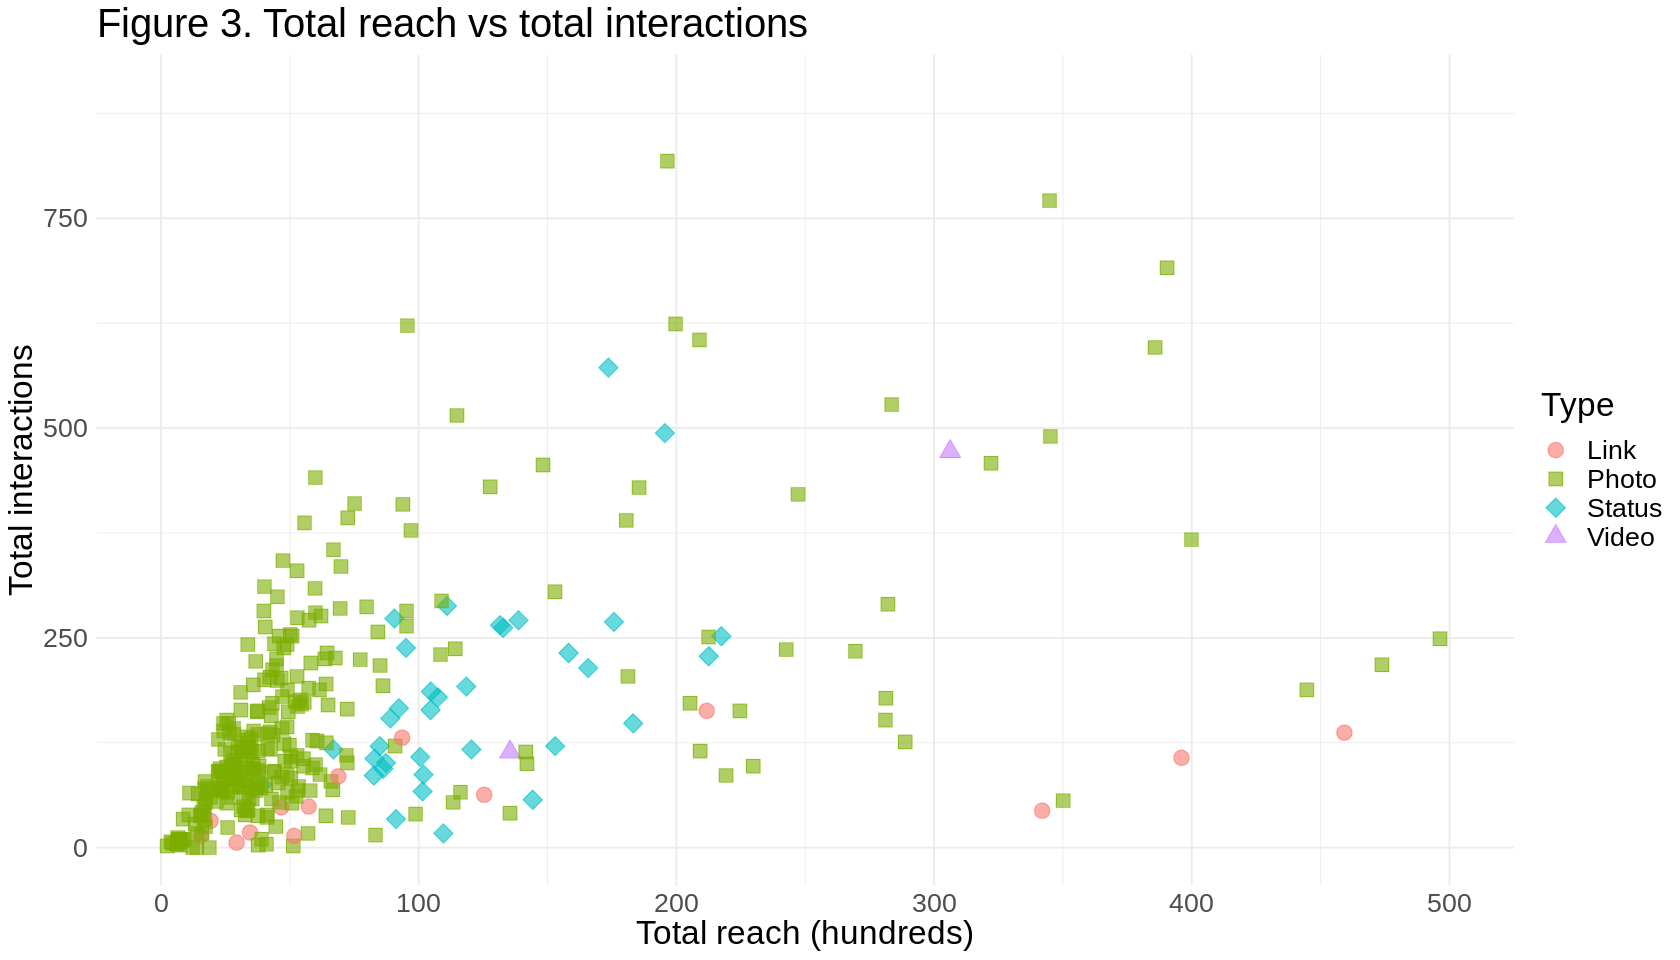

In [14]:
unpaid_plot <- facebook_clean_unpaid %>% 
    ggplot(aes(x = Lifetime_Post_Total_Reach/100,
               y = Total_Interactions,
               shape = Type,
               color = Type,
               fill = Type)) +
    geom_point(alpha=0.6, size=4) +
    labs(x = "Total reach (hundreds)", y = "Total interactions",
         title = "Figure 3. Total reach vs total interactions", group = "Type")+
    scale_y_continuous(limits = c(0,900)) +
    scale_x_continuous(limits = c(0,500)) +
    scale_shape_manual(values = c(21,22,23,24)) +
    scale_size_manual(values=c(1,6,7,9)) +
    theme_minimal() +
    theme(text = element_text(size = 20))
    options(repr.plot.width =14, repr.plot.height = 8)

unpaid_plot 

#### ii) Identification of Class Imbalances
We want to be able to identify possible class imbalances as the KNN-classification model is a lazy learning algorithm.
Thus we need to ensure that our data set is balanced.
We start by reviewing summary statistics and quickly visualizing the distribution of observations.

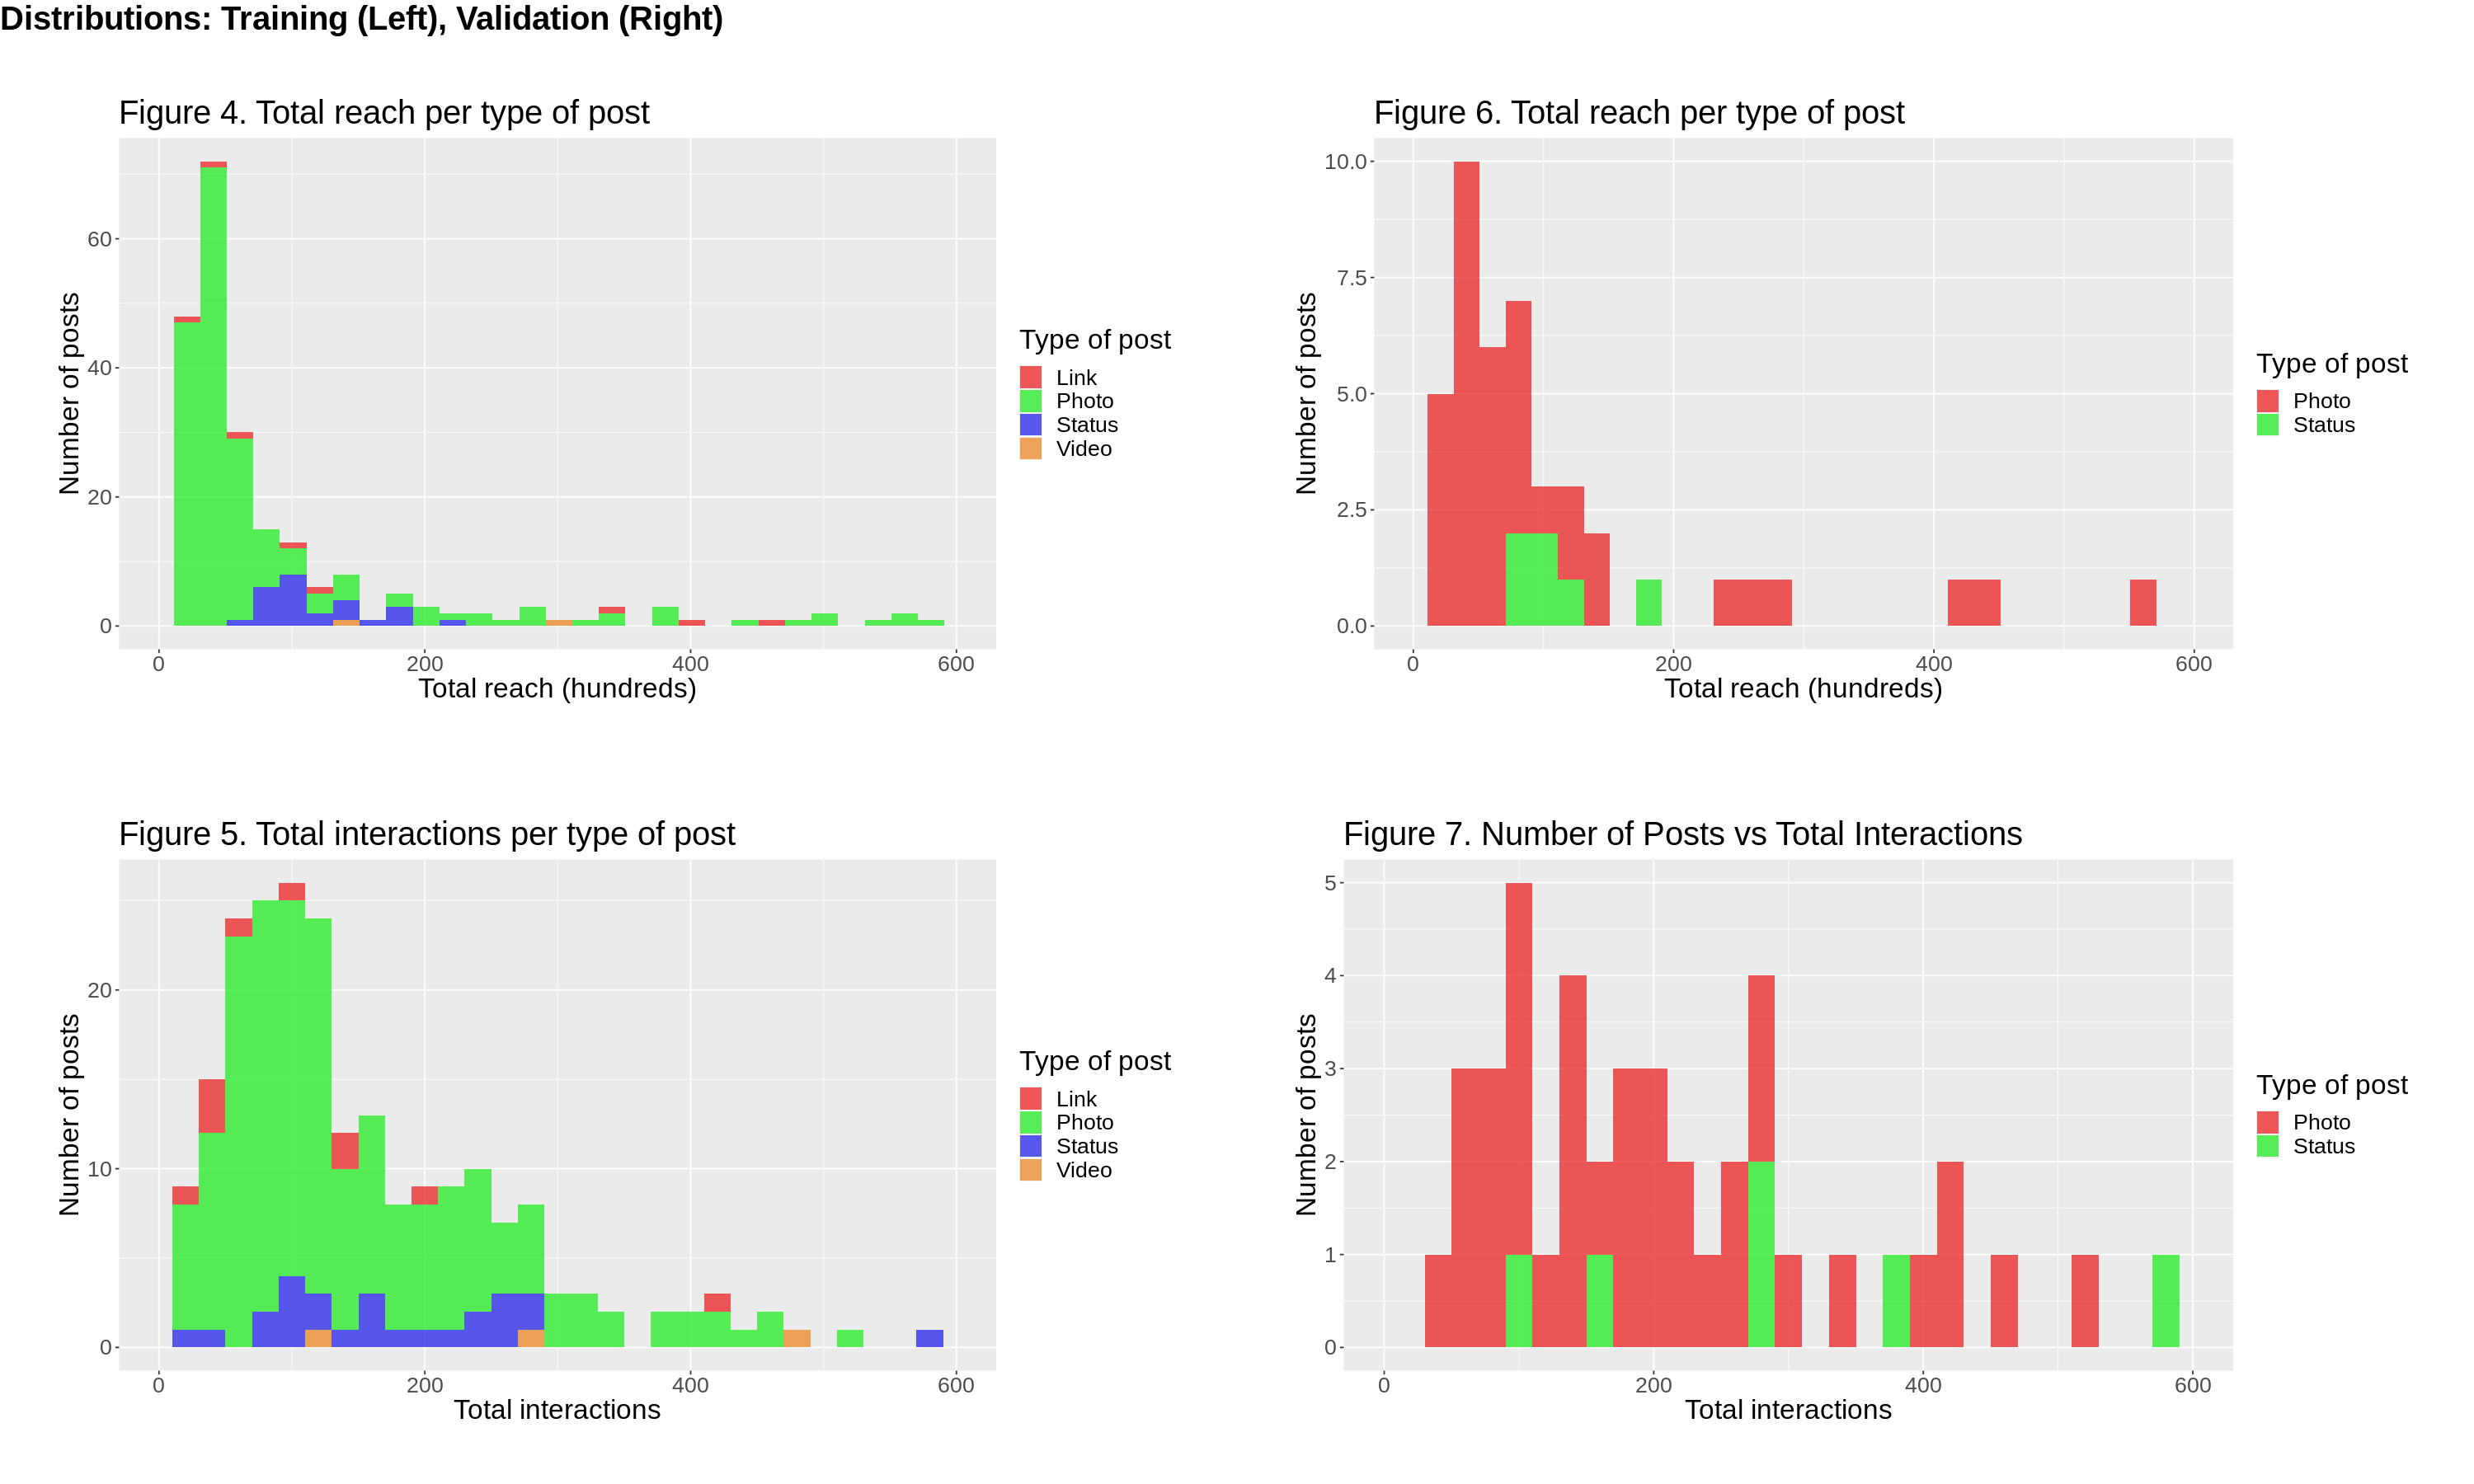

In [15]:
options(repr.plot.width = 25, repr.plot.height = 15)

test_unpaid_hist_1 <- train_set_unpaid %>%
    ggplot(aes(fill=Type, x=Lifetime_Post_Total_Reach/100))+
    geom_histogram(binwidth = 20,
                   center = 1,
                   boundary = NULL,
                   alpha = 0.7,
                   position = position_stack(vjust = 0, reverse=FALSE)) +
    labs(x = "Total reach (hundreds)", y = "Number of posts",
         title = "Figure 4. Total reach per type of post", fill="Type of post") +
    scale_x_continuous(limits = c(0, 600)) +
    scale_fill_manual(values = c("#eb1515", "#15eb15", "#1515eb", "#eb8015")) +
    theme(text = element_text(size = 20), plot.margin = unit(c(3,3,3,3), "lines"))

test_unpaid_hist_2 <- train_set_unpaid %>%
    ggplot(aes(x=Total_Interactions, fill=Type))+
    geom_histogram(binwidth = 20,
                   alpha = 0.7,
                   position = position_stack(vjust=0, reverse=FALSE)) +
    labs(x = "Total interactions", y = "Number of posts",
         title = "Figure 5. Total interactions per type of post", fill = "Type of post") +
    scale_fill_manual(values = c("#eb1515", "#15eb15", "#1515eb", "#eb8015")) +
    scale_x_continuous(limits = c(0, 600)) +
    theme(text = element_text(size = 20), plot.margin = unit(c(3,3,3,3), "lines"))

test_val_hist_1 <- val_set %>%
    ggplot(aes(fill=Type, x=Lifetime_Post_Total_Reach/100))+
    geom_histogram(binwidth = 20,
                   center = 1,
                   boundary = NULL,
                   alpha = 0.7,
                   position = position_stack(vjust = 0, reverse = FALSE)) +
    labs(x = "Total reach (hundreds)", y = "Number of posts",
         title = "Figure 6. Total reach per type of post", fill = "Type of post") +
    scale_x_continuous(limits = c(0, 600)) +
    scale_fill_manual(values = c("#eb1515", "#15eb15", "#1515eb", "#eb8015")) +
    theme(text = element_text(size = 20), plot.margin = unit(c(3,3,3,3), "lines"))

test_val_hist_2 <- val_set %>%
    ggplot(aes(x=Total_Interactions, fill=Type))+
    geom_histogram(binwidth = 20,
                   alpha = 0.7,
                   position = position_stack(vjust = 0, reverse = FALSE)) +
    labs(x = "Total interactions", y = "Number of posts",
         title = "Figure 7. Number of Posts vs Total Interactions", fill = "Type of post") +
    scale_fill_manual(values = c("#eb1515", "#15eb15", "#1515eb", "#eb8015")) +
    scale_x_continuous(limits = c(0, 600)) +
    theme(text = element_text(size = 20), plot.margin = unit(c(3,3,3,3), "lines"))


grid.arrange(test_unpaid_hist_1, test_val_hist_1, test_unpaid_hist_2, test_val_hist_2, ncol=2,
             top = textGrob(expression(bold("Distributions: Training (Left), Validation (Right)")),
                            x =0, hjust=0, gp=gpar(fontsize = 24)))

#### iii) Balancing Decision

We see the distribution of the type of posts is not equal so we should consider balancing.
However, this introduces potential complications in further parts of our analysis, mainly the cross-validation step.
We find that balancing our data in this part of our analysis results in overestimated accuracies for our cross-validation model later on.
Additionally, we are hesitant to balance the training set because this alternation is not reflected in our testing set, which can lead to more uncertainty.
Because of these factors, we chose to leave our data unbalanced.
We believe this will lead to less biased results when using our training data set further in our report.

---

### d) Building our Model

#### i) Overview
We use the original training data into our tuning selection process.
Then by scaling the data and following the tidymodel recipes workflow, we collect the results from various values of $k$.
Our base value of $k$ is set to 3.

In [16]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
      set_engine("kknn") %>%
      set_mode("classification")

unpaid_recipe <- recipe(Type ~ 
                        Lifetime_Post_Total_Reach + Total_Interactions,
                        data = train_set_unpaid) %>%
                    step_scale(all_predictors()) %>%
                    step_center(all_predictors())

unpaid_fit <- workflow() %>%
    add_recipe(unpaid_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = train_set_unpaid)

unpaid_val_predicted <- predict(unpaid_fit, val_set_unpaid) %>%
    bind_cols(val_set_unpaid)

unpaid_prediction_accuracy <- unpaid_val_predicted %>%
    metrics(truth = Type, estimate = .pred_class)

print("Table 8. Prediction accuracy for unpaid posts using k=3")
unpaid_prediction_accuracy

unpaid_val_predicted %>%
    conf_mat(truth = Type, estimate = .pred_class)

[1] "Table 8. Prediction accuracy for unpaid posts using k=3"


.metric  .estimator .estimate
1 accuracy multiclass 0.8333333
2 kap      multiclass 0.4130435

          Truth
Prediction Link Photo Status Video
    Link      0     0      0     0
    Photo     0    27      1     0
    Status    0     5      3     0
    Video     0     0      0     0

Our pre-tuned model accuracy against our validation set was roughly 83%. The low accuracy is connected with the collection of observations within the validation data set itself. Our validation set which was sampled at random had only included observations from 2 types: Photo and Status. Upon running our model against this sample population, the collection of predictions included observations from the Link category as well thus creating inaccuracy in our model. In the following steps, we will hopefully tune and increase our base accuracy while accounting for the small sample of the validation set.

#### ii) Tuning

1. We will perform the cross-validation technique with 10 folds to account for randomness.

In [17]:
set.seed(99)
unpaid_vfold <- vfold_cv(train_set_unpaid, v = 10, strata = Type)

unpaid_fit_v2 <- workflow() %>%
    add_recipe(unpaid_recipe) %>%
    add_model(knn_spec) %>%
    fit_resamples(resamples = unpaid_vfold) %>% collect_metrics() %>%
    suppressMessages()

print("Table 9. Average model accuracy using 10 fold cross-validation")
unpaid_fit_v2

[1] "Table 9. Average model accuracy using 10 fold cross-validation"


.metric  .estimator mean      n  std_err    .config             
1 accuracy multiclass 0.8705513 10 0.01497291 Preprocessor1_Model1
2 roc_auc  hand_till  0.7359019 10 0.04528300 Preprocessor1_Model1

Through a 10 fold cross-validation method, the accuracy of our model averages to approximately 87%. Given a standard error of roughly 0.01, our estimated true average accuracy falls between $[0.86, 0.88]$. The increase in accuracy can be explained through the choice of data used in the "vfold()" function. The validation set created from the **vfold()** function splits our training data into subsections while the prediction model compares the validation set against the predicted values. Thus with a better holistic representation of our sample, our accuracy increases.

2. Next we will perform a parameterization selection method to select a better value for K.

In [18]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

knn_results <- workflow() %>%
    add_recipe(unpaid_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = unpaid_vfold, grid = 10) %>% 
    collect_metrics() %>%
    suppressMessages()

accuracies <- knn_results %>% 
    filter(.metric == "accuracy")

print("Table 10. Prediction accuracies of models using different values for k")
accuracies

[1] "Table 10. Prediction accuracies of models using different values for k"


neighbors .metric  .estimator mean      n  std_err    .config             
1  2        accuracy multiclass 0.8181538 10 0.02712502 Preprocessor1_Model1
2  3        accuracy multiclass 0.8705513 10 0.01497291 Preprocessor1_Model2
3  5        accuracy multiclass 0.8787308 10 0.01487359 Preprocessor1_Model3
4  8        accuracy multiclass 0.8710385 10 0.01310408 Preprocessor1_Model4
5 10        accuracy multiclass 0.8793590 10 0.01300640 Preprocessor1_Model5
6 12        accuracy multiclass 0.8596538 10 0.01812502 Preprocessor1_Model6
7 13        accuracy multiclass 0.8399487 10 0.02010626 Preprocessor1_Model7
8 14        accuracy multiclass 0.8357821 10 0.01872398 Preprocessor1_Model8

3. Then using our collected metrics, we can visualize our accuracies to refine our value of K.

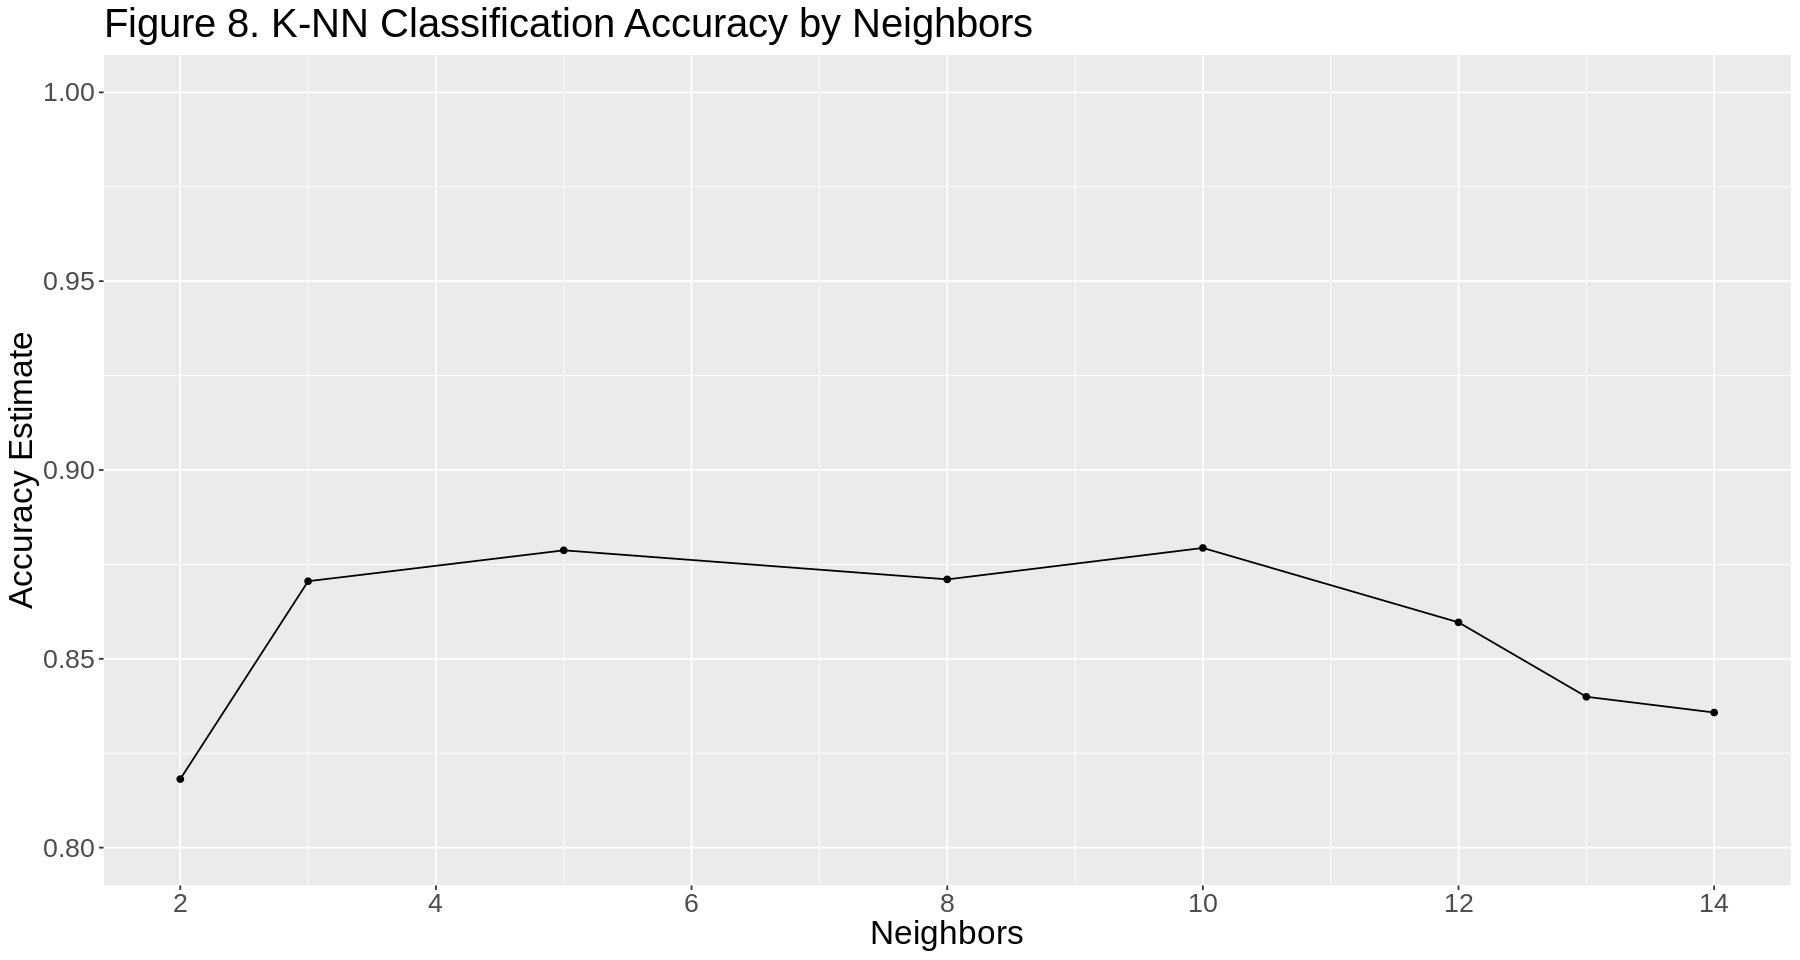

In [19]:
options(repr.plot.width=15, repr.plot.height=8)

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate",
         title = "Figure 8. K-NN Classification Accuracy by Neighbors") +
    scale_x_continuous(breaks = seq(0, 16, by = 2)) +  # adjusting the x-axis
    scale_y_continuous(limits = c(0.8, 1.0)) + # adjusting the y-axis
    theme(text = element_text(size = 20))

accuracy_versus_k

In [20]:
print("Table 11. Highest prediction accuracy from tuned models")
most_accurate_k <- knn_results %>% filter(.metric == "accuracy") %>% arrange(desc(mean)) %>% slice(1)
most_accurate_k

[1] "Table 11. Highest prediction accuracy from tuned models"


neighbors .metric  .estimator mean     n  std_err   .config             
1 10        accuracy multiclass 0.879359 10 0.0130064 Preprocessor1_Model5

The visualization suggests that $k=9$ averages the highest accuracy of ~88% from our 10 cross-validation sets.
We edit our model specification to take $k=9$ instead of $k=3$ as follows.
After doing so, we can compare the accuracy of each model.

#### iii) Accuracy Comparison

In [21]:
# we use the same recipe, change spec

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) %>%
    set_engine("kknn") %>%
    set_mode("classification")

unpaid_fit_tuned <- workflow() %>%
    add_recipe(unpaid_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = train_set_unpaid)

unpaid_val_predicted_tuned <- predict(unpaid_fit_tuned, val_set_unpaid) %>%
    bind_cols(val_set_unpaid)

unpaid_prediction_accuracy_tuned <- unpaid_val_predicted_tuned %>%
    metrics(truth = Type, estimate = .pred_class) %>% filter(.metric == "accuracy")

model_improvement <- unpaid_prediction_accuracy_tuned$.estimate - unpaid_prediction_accuracy$.estimate

print("Table 12. Tuned prediction accuracy using k=9")
unpaid_prediction_accuracy_tuned

print("Model improvement:")
print(model_improvement)

[1] "Table 12. Tuned prediction accuracy using k=9"


.metric  .estimator .estimate
1 accuracy multiclass 0.9166667

[1] "Model improvement:"
[1] 0.08333333 0.50362319


---

### e) Analysis

#### i) Classifying a New Observation

In this section, we use the results of our accuracy model to predict the class of a new observation. Since our two predictors, `Total Interactions` and `Lifetime_Post_Total_Reach`, have a largely different range of values, we first centered and scaled them. 

In [22]:
new_obs_total_interactions <- 4
new_obs_total_reach <- 2

fb_recipe <- recipe(Type ~
                    Total_Interactions + Lifetime_Post_Total_Reach,
                    data=facebook_clean_unpaid) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()

scaled_fb_unpaid <- bake(fb_recipe, facebook_clean_unpaid)

print("Table 13. 9 nearest neighbours to new observation, arranged by dstance")
scaled_fb_unpaid %>%
  dplyr::select(Total_Interactions, Lifetime_Post_Total_Reach, Type) %>%
  mutate(dist_from_new = sqrt((Total_Interactions - new_obs_total_interactions)^2 +
                              (Lifetime_Post_Total_Reach - new_obs_total_reach)^2)) %>%
  arrange(dist_from_new) %>%
  slice(1:9)

new_obs <- tibble(Total_Interactions = 4, Lifetime_Post_Total_Reach = 2)

print("Prediction for new observation:")
predict(unpaid_fit_tuned, new_obs)$.pred_class[1]

[1] "Table 13. 9 nearest neighbours to new observation, arranged by dstance"


Total_Interactions Lifetime_Post_Total_Reach Type  dist_from_new
1 3.765548           2.891357                  Photo 0.9216754    
2 4.970207           2.221724                  Photo 0.9952198    
3 4.377817           1.071736                  Photo 1.0022075    
4 2.950514           1.921900                  Photo 1.0523876    
⋮ ⋮                  ⋮                         ⋮     ⋮            
6 2.521131           2.101635                  Photo 1.482357     
7 2.314391           1.118658                  Photo 1.902115     
8 5.713676           2.829325                  Photo 1.903803     
9 1.996329           1.345315                  Photo 2.107916

[1] "Prediction for new observation:"


[1] Photo
Levels: Link Photo Status Video

Since our predictors are scaled, their output values are also expressed in their scaled form.
As such, the values for our 9 $k$ nearest neighbours might appear different from the values  we used to predict the class of the new observation.
However, the results still help us identify the 9 nearest neighbours, which we can then use to predict the class of the new observation.
The results of our model predict that the new observation is a **Photo.**

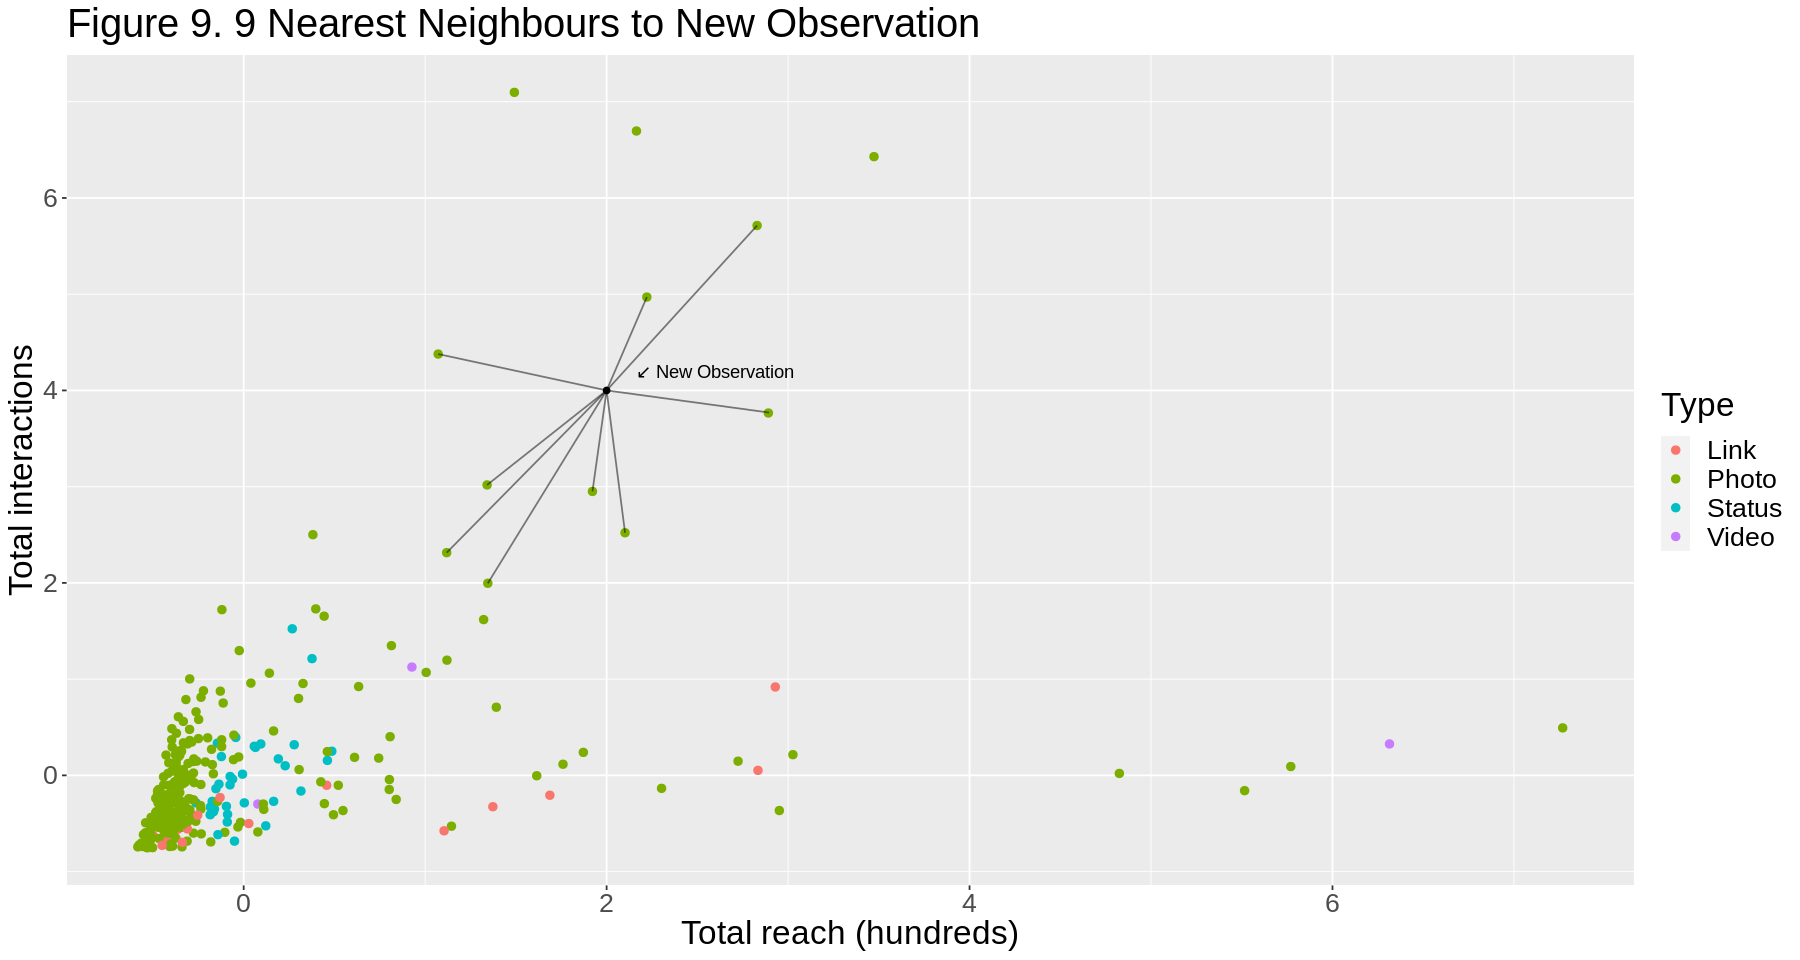

In [23]:
#Prediction plot for our new observation
new_prediction_plot <-
    ggplot()+
    geom_point(data = scaled_fb_unpaid, 
               mapping = aes(x = Lifetime_Post_Total_Reach,
               y = Total_Interactions,
               color = Type), 
               alpha=1, size=2) +
    labs(x = "Total reach (hundreds)", y = "Total interactions",
               title = "Figure 9. 9 Nearest Neighbours to New Observation")+
    theme(text=element_text(size=20)) +
    geom_segment(aes(x = 2, y = 4, xend = 2.895676, yend = 3.769853), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 2.221724, yend = 4.970207), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 1.071736, yend = 4.377817), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 1.921900, yend = 2.950514), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 1.341339, yend = 3.018103), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 2.101635, yend = 2.521131), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 1.118658, yend = 2.314391), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 2.829325, yend = 5.713676), alpha = 0.5)+
    geom_segment(aes(x = 2, y = 4, xend = 1.345315, yend = 1.996329), alpha = 0.5)+
    geom_point(aes(x = 2, y = 4)) +
    annotate("text", x = 2.6, y =  4.2, label = "↙ New Observation")

new_prediction_plot 

Here, we can see that all 9 $k$ nearest neighbours are of type **Photo**.

#### Prediction Possibilities

Here, we explore how a new observation might be classified based on a given set of predictor values.

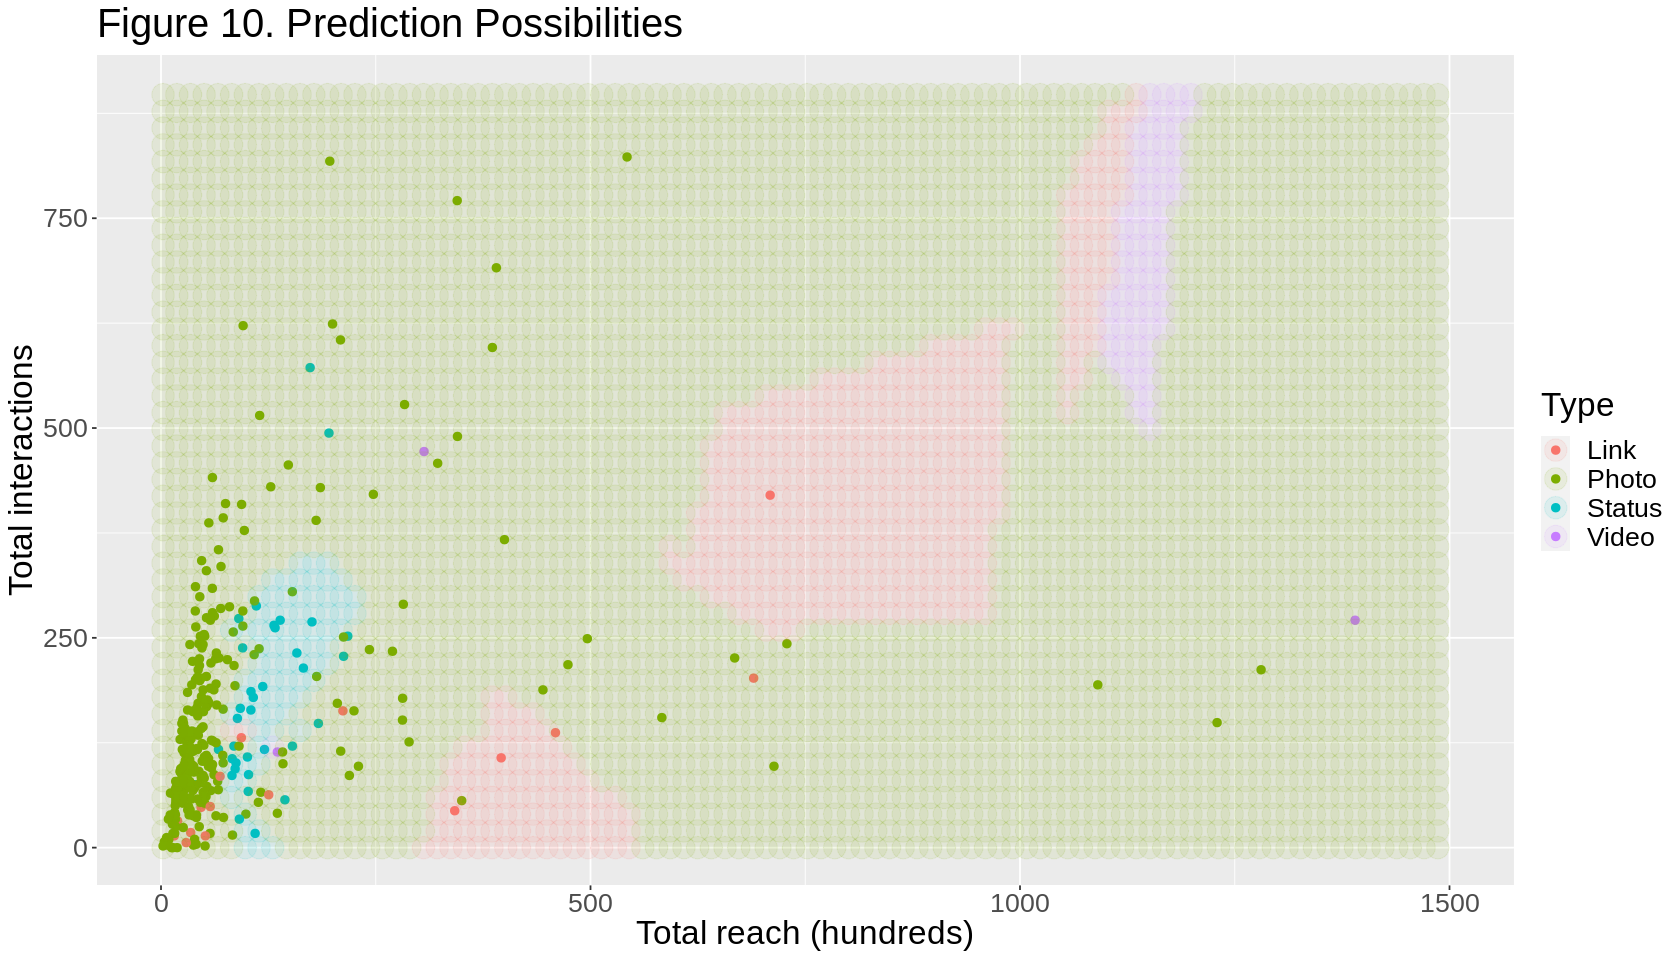

In [24]:
#A visualization for the prediction possibilities
options(repr.plot.width =14, repr.plot.height = 8) 

reach_grid <- seq(min(facebook_clean_unpaid$Lifetime_Post_Total_Reach),
                  max(facebook_clean_unpaid$Lifetime_Post_Total_Reach),
                  length.out = 100)

interactions_grid <- seq(min(facebook_clean_unpaid$Total_Interactions),
                         max(facebook_clean_unpaid$Total_Interactions),
                         length.out = 100)

asgrid <- as_tibble(expand.grid(Lifetime_Post_Total_Reach=reach_grid,
                                Total_Interactions=interactions_grid))

knnPredGrid <- predict(unpaid_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) %>% rename(Type = .pred_class)

wkflw_plot <-
    ggplot()+
    geom_point(data = facebook_clean_unpaid, 
               mapping = aes(x = Lifetime_Post_Total_Reach/100,
               y = Total_Interactions,
               color = Type), 
               alpha=1, size=2) +
    geom_point(data = prediction_table, 
               mapping = aes(x = Lifetime_Post_Total_Reach/100,
               y = Total_Interactions,
               color = Type),
               alpha=0.09, size=6.)+
    labs(x = "Total reach (hundreds)", y = "Total interactions",
         title = "Figure 10. Prediction Possibilities")+
    scale_y_continuous(limits = c(0,900)) +
    scale_x_continuous(limits = c(0,1500)) +
    theme(text=element_text(size=20))

wkflw_plot

This plot shows us how a new observation will be classified based on values for Total interactions and Total reach. An observation in the green area will be classified as a **Link**, a new observation in the green area will be classified as a **Photo**, and so on.

---

### f) Results

After changing our model spec from $k$ = 3 to $k$ = 9, we see that the modifications to our model have increased our accuracy by *8.3%*, (i.e., from *83.33%* to *91.67%*) and thus we will choose the tuned model.

A possible reason the unusually high value of $k$ may lie within the validation data set. As previously discussed, the validation set was a poor holistic representation of our sample and to account for false positives, the model produced a higher critical value.

Note that throughout our procedure, we chose to use only the unpaid posts as paid posts introduce a new variable that is the amount paid for the advertisement.
This variable affects the length of time being promoted and the scope that targets specific audiences and thus is more likely to interact with the post.

We also used the variables "total interactions", which is the aggregation of the variables "like", "share", and "comment", and "lifetime total reach" which refers to the number of views, as predictors to predict the type of post.
Based on our tuned model, we can predict which type of post will be successful with an accuracy of 91.67%.

---

## 3. Discussion

Our model has shown the most accuracy with a $k$ value of 9 and with an accuracy of 91.67%.
We ran into the problem of an unbalanced dataset where videos, links, and statuses made up only 54 of 264 total observations.
Our model decided to acknowledge this unbalance and leave it as is for the reason that by balancing it, it drastically biased our model to produce a very high accuracy rate (roughly 96%).
Considering that without balancing the dataset, the accuracy rate of our model at 91.67% was good enough. 

As our research question asks which type of posts will be the most successful, our model first demonstrated the positive relationship between total impressions and total reach by type of posts which allowed to use them as our two main predictors.
Our model showed that as total reach increases total impressions (likes, shares, comments) are likely to increase as well.
Therefore, the underlying logic of our question is which type of post is likely to have the most reach, but as the type of content, such as videos or links, affects the likeliness of generating likes and comments which, in turns, is more likely to be picked up by Facebook's algorithm to then become viral.
Thus, it creates a positive feedback loop as viral posts, if made public, increase Facebook's placement of the post in user's newsfeed resulting in an increased reach (Quesenberry & Coolsen, 2019).
Therefore, we used both total reach and total impression to predict the success of a Facebook post.

---

## 4. References

Moro, S., Rita, P., & Vala, B. (2016).
"Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach", 
Journal of Business Research. 69(9), 3341 - 3351. 

Quesenberry, Keith A. & Coolsen, Michael K. (2019).
"What Makes Facebook Brand Posts Engaging? A Content Analysis of Facebook Brand Post Text That Increases Shares, Likes, and Comments to Influence Organic Viral Reach",
Journal of Current Issues & Research in Advertising, 40(3), 244-299.

In [25]:
print("Table 14. Original Facebook data")
facebook

[1] "Table 14. Original Facebook data"


Page_total_likes Type   Category Post_Month Post_Weekday Post_Hour Paid
1   139441           Photo  2        12         4            3         0   
2   139441           Status 2        12         3            10        0   
3   139441           Photo  3        12         3            3         0   
4   139441           Photo  2        12         2            10        1   
⋮   ⋮                ⋮      ⋮        ⋮          ⋮            ⋮         ⋮   
497 81370            Photo  2        1          5            8         0   
498 81370            Photo  1        1          5            2         0   
499 81370            Photo  3        1          4            11        0   
500 81370            Photo  2        1          4            4         NA  
    Lifetime_Post_Total_Reach Lifetime_Post_Total_Impressions
1    2752                      5091                          
2   10460                     19057                          
3    2413                      4373                          
4   50128                     87991                          
⋮   ⋮                         ⋮                              
497 3480                      6229                           
498 3778                      7216                           
499 4156                      7564                           
500 4188                      7292                           
    Lifetime_Engaged_Users Lifetime_Post_Consumers Lifetime_Post_Consumptions
1    178                    109                     159                      
2   1457                   1361                    1674                      
3    177                    113                     154                      
4   2211                    790                    1119                      
⋮   ⋮                      ⋮                       ⋮                         
497 537                    508                     687                       
498 625                    572                     795                       
499 626                    574                     832                       
500 564                    524                     743                       
    Lifetime_Post_Impressions_by_people_who_have_liked_your_Page
1    3078                                                       
2   11710                                                       
3    2812                                                       
4   61027                                                       
⋮   ⋮                                                           
497 3961                                                        
498 4742                                                        
499 4534                                                        
500 3861                                                        
    Lifetime_Post_reach_by_people_who_like_your_Page
1    1640                                           
2    6112                                           
3    1503                                           
4   32048                                           
⋮   ⋮                                               
497 2104                                            
498 2388                                            
499 2452                                            
500 2200                                            
    Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post comment
1    119                                                                 4     
2   1108                                                                 5     
3    132                                                                 0     
4   1386                                                                58     
⋮   ⋮                                                                   ⋮      
497 301                                                                 0      
498 363                                                                 4      
499 370                 